In [1]:
import numpy as np
from scipy.special import gamma as Gamma
from scipy.special import gammaln as GammaLn
from numpy.random import multivariate_normal as mvn 
from scipy.stats import multivariate_normal as multinorm
#
from sklearn.neighbors import NearestNeighbors
# -- nonGaussLike -- 
from nongausslike import knn as kNN
from nongausslike import nongauss as NG

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def avgKL_XY_SKL(X, m, k, n_sample=10, Cov=None): 
    d = X.shape[1]
    _kl = []
    for i in range(n_sample): 
        Y = mvn(np.zeros(d), Cov, size=m)
        _kl.append(NG.kNNdiv_gauss(X, None, Knn=k, div_func='kl', gauss=Y))
    return np.average(_kl)

In [11]:
def avgRenyi_XY_SKL(X, m, k, alpha=0.99, n_sample=10, Cov=None): 
    d = X.shape[1]
    _kl = []
    for i in range(n_sample): 
        Y = mvn(np.zeros(d), Cov, size=m)
        _kl.append(NG.kNNdiv_gauss(X, None, Knn=k, div_func='renyi:0.99', gauss=Y))
    return np.average(_kl)

In [5]:
X_pk = NG.X_pk_all('patchy.z1', NorS='ngc', sys='fc')
n, dim = X_pk.shape
print("%i dimensional data with %i samples" % (dim, n))

X_res, _ = NG.meansub(X_pk)
X_w, W = NG.whiten(X_res)
C_x = np.cov(X_w.T)


37 dimensional data with 2048 samples


In [6]:
def Xsample(n): 
    return mvn(np.zeros(dim), C_x, size=n)

In [8]:
X_ref = Xsample(n)

In [14]:
ms = [1000, 2000, 4000, 6000]
KL_XY = []
Re099_XY = []
Re0999_XY = []
for m in ms: 
    KL_XY.append(avgKL_XY_SKL(X_ref, m, 10, Cov=C_x))
    Re099_XY.append(avgRenyi_XY_SKL(X_ref, m, 10, alpha=0.99, Cov=C_x))
    Re0999_XY.append(avgRenyi_XY_SKL(X_ref, m, 10, alpha=0.999, Cov=C_x))

(1000, 6000)

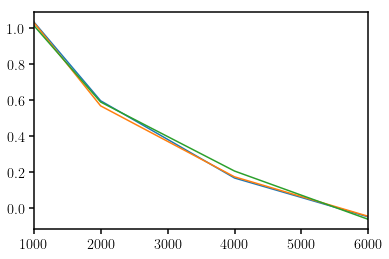

In [15]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(ms, KL_XY)
sub.plot(ms, Re099_XY)
sub.plot(ms, Re0999_XY)
sub.set_xlim([1000, 6000])